# Random Forest

## Imports

In [2]:
import numpy as np
from keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Preprocessing

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## I used a smaller subset (my laptop can't do the full dataset)
train_size = 10000
test_size = 2000

train_images_flat = train_images[:train_size].reshape(train_size, -1) / 255.0
test_images_flat = test_images[:test_size].reshape(test_size, -1) / 255.0
train_labels_int = train_labels[:train_size]
test_labels_int = test_labels[:test_size]

## Training

### Training Loop

In [ ]:
print("Training Random Forest...")

rf = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 30,
    min_samples_split = 5,
    min_samples_leaf = 2,
    max_features = 'sqrt',
    n_jobs = -1,
    random_state = 1,
    verbose = 1
)

rf.fit(train_images_flat, train_labels_int)

Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                       n_jobs=-1, random_state=42, verbose=1)

### Predictions

In [ ]:
predictions = rf.predict(test_images_flat)
accuracy = accuracy_score(test_labels_int, predictions)

print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(test_labels_int, predictions))


Accuracy: 0.9240

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       175
           1       0.98      0.98      0.98       234
           2       0.92      0.91      0.91       219
           3       0.92      0.92      0.92       207
           4       0.94      0.92      0.93       217
           5       0.93      0.92      0.92       179
           6       0.90      0.95      0.93       178
           7       0.93      0.88      0.91       205
           8       0.91      0.85      0.88       192
           9       0.86      0.92      0.89       194

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


## Visualizations

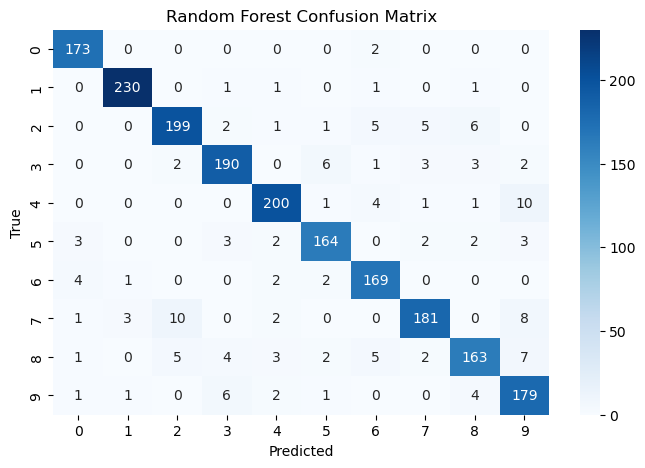

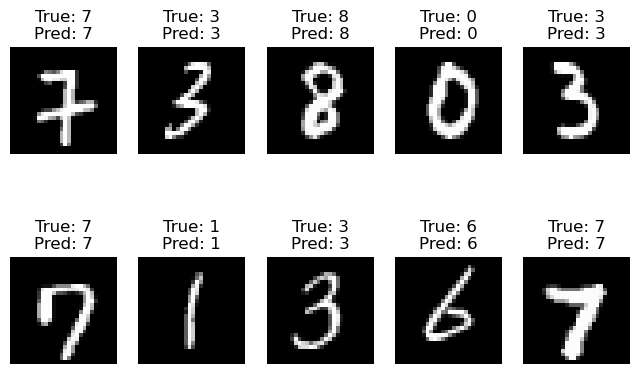

In [20]:
## confusion matrix
cm = confusion_matrix(test_labels_int, predictions)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Sample predictions
from numpy.random import randint
test_size = len(test_labels_int)
rand_start = np.random.randint(0, test_size - 10)

plt.figure(figsize = (8, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[rand_start + i].reshape(28, 28), cmap = 'gray')
    plt.title(f'True: {test_labels_int[rand_start + i]}\nPred: {predictions[rand_start + i]}')
    plt.axis('off')
plt.show()